In [1]:
%cd ../src
from loader import * 
from datasets import *
from vis_utils import *
from utils import *
from stats import * 
from logs import logger
import logs,datasets,vis_utils,loader
logger.setLevel(logs.WARN)
%load_ext autoreload
%reload_ext autoreload

%autoreload 2
matplotlib.style.use('ggplot')
%matplotlib inline

/mnt/lustre/prj/Perf_Pred/src


Using TensorFlow backend.
/home/yxli/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [ ]:
visualizer.tensor.shape
df=visualizer.tensor.copy()
indexf = MultiIndexFacilitate(df.unstack().index)
level_name='name'
t=df.unstack().reset_index()
t.head()
t.loc[(t.name=='Layer10/fc/act') & (t.hiddens=='512') &(t.model_type=='vgg10')]

In [ ]:
acts = t.loc[(t.name=='Layer10/fc/act') & (t.hiddens=='512') ][0].values.tolist()
kers = t.loc[(t.name=='Layer10/fc/kernel_1') & (t.hiddens=='512')][0].values.tolist()
inps = t.loc[(t.name=='Layer10/fc/in') & (t.hiddens=='512')][0].values.tolist()
softs  = t.loc[(t.name=='Layer10/softmax/act') & (t.hiddens=='512')][0].values.tolist()

In [ ]:
for act,ker,inp,soft in zip(acts,kers,inps,softs):
    break
act,ker,inp,soft=acts[-1],kers[-1],inps[-1],softs[-1]
# print act.shape,ker.shape,inp.shape,soft.shape


1.40573
0.583884


(array([ 135.,  184.,  231.,  221.,  114.,  637.,  642.,  177.,  338.,   41.]),
 array([-0.06153827, -0.05348167, -0.04542507, -0.03736846, -0.02931186,
        -0.02125526, -0.01319866, -0.00514206,  0.00291455,  0.01097115,
         0.01902775]),
 <a list of 10 Patch objects>)

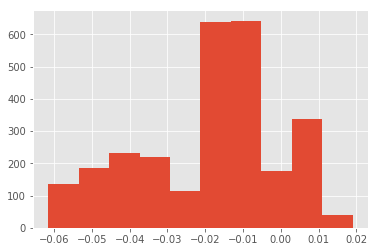

In [461]:
print np.linalg.norm(ker,axis=0).mean()
ker = ker / np.linalg.norm(ker,axis=0)

print np.linalg.norm(inp,axis=1).mean()
inp = inp / np.linalg.norm(inp,axis=1).reshape(-1,1)

act2=np.dot(inp,ker)

plt.hist(act2.ravel())

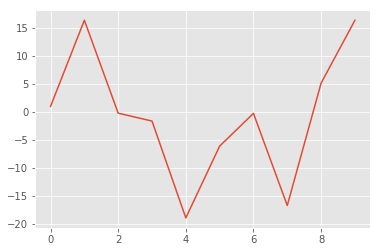

In [445]:
plt.plot(act[0,:])

(array([ 2396.,    26.,    11.,    10.,     9.,     8.,     7.,    10.,
           15.,   228.]),
 array([  4.68851028e-33,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

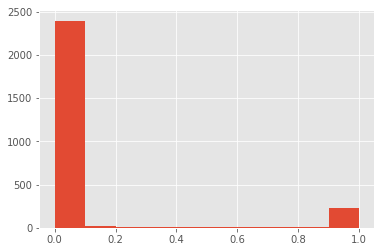

In [446]:
plt.hist(soft.flatten())

In [447]:
act=act2

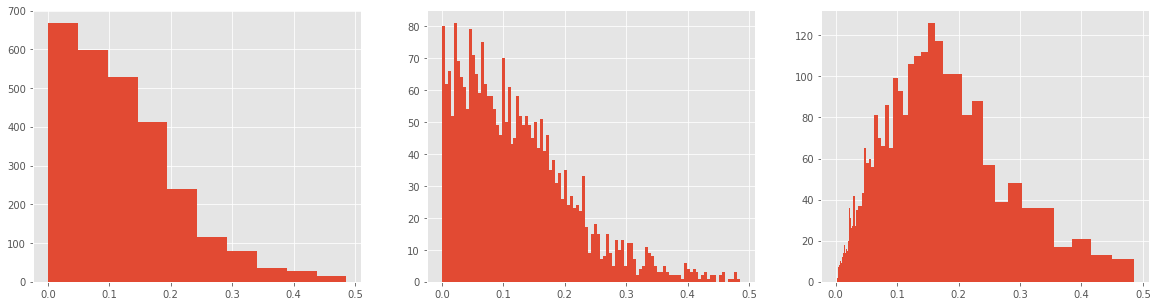

In [448]:
plt.figure(figsize=(20,5))
act4=np.abs(act).flatten()
plt.subplot(131)
plt.hist(act4)

plt.subplot(132)
_=plt.hist(act4,bins=100)

ax=plt.subplot(133)
_=plt.hist(act4,bins=(np.logspace(np.log10(act4.min()),np.log10(act4.max()),num=100)))
# ax.set_xscale('log')

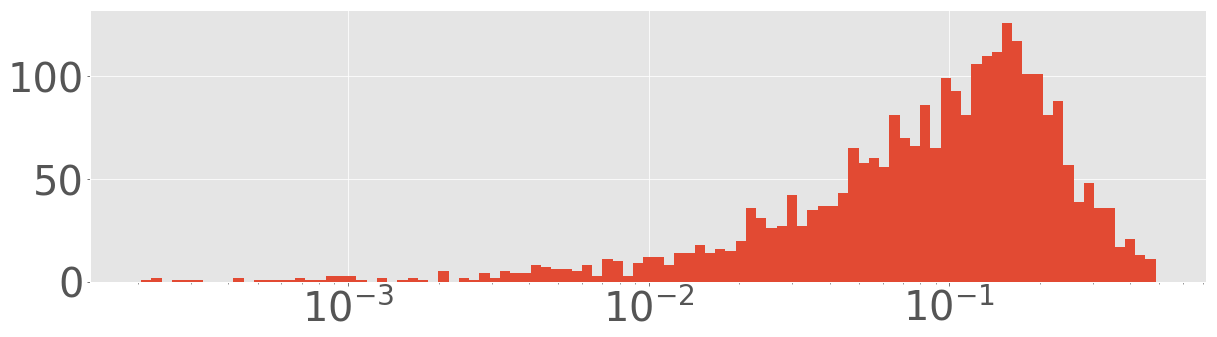

In [449]:
import matplotlib
matplotlib.rcParams.update({'font.size': 40})
fig,ax=plt.subplots(1,figsize=(20,5))
ax.hist(act4,bins=(np.logspace(np.log10(act4.min()),np.log10(act4.max()),num=100)))
ax.set_xscale('log')


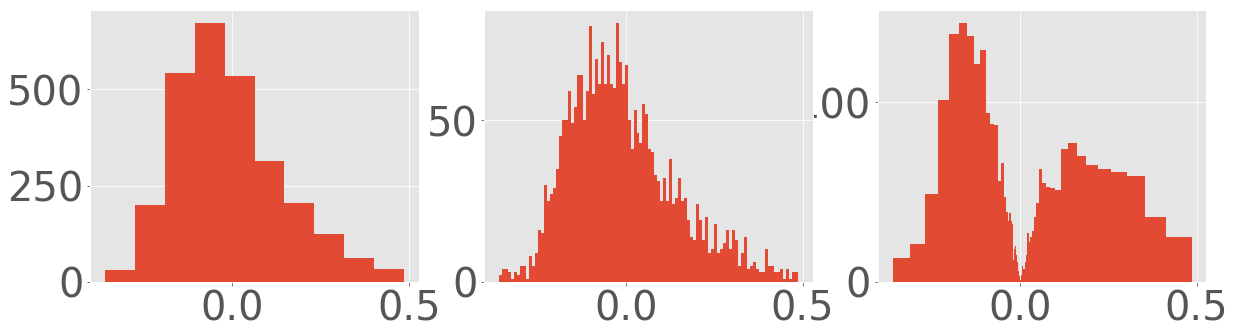

In [450]:
act5=act.flatten()

def get_bin(act5):
    return np.logspace(np.log10(act5[act5>0].min()),np.log10(act5[act5>0].max()  ) ,num=50 )

mybin=np.concatenate([get_bin(act5[act5>0]),-get_bin(-act5[act5<0]) ])
mybin.sort()
# mybin
plt.figure(figsize=(20,5)) 
ax=plt.subplot(133)
_=plt.hist(act5,bins=mybin)
# ax.set_xscale('log')
plt.subplot(132)
_=plt.hist(act5,bins=100)
plt.subplot(131)
_=plt.hist(act5)

(272, 10) (512, 10) (272, 512) (272, 10)
2.32291
29.0265
(272, 10) (512, 10) (272, 512) (272, 10)
1.23902
7.40503


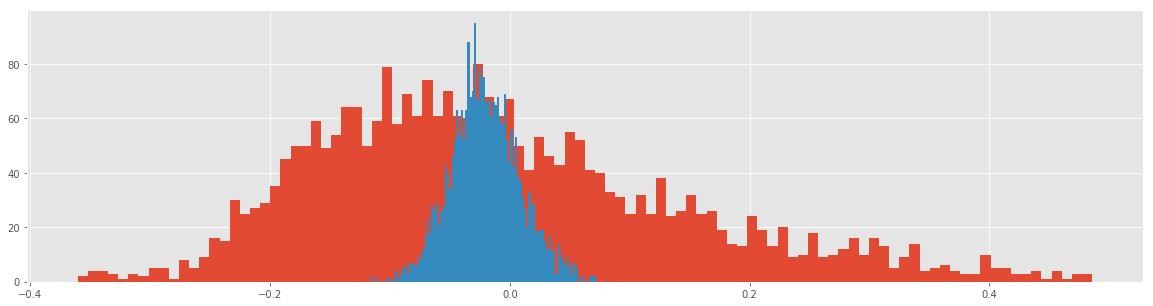

In [451]:
for act,ker,inp,soft in zip(acts,kers,inps,softs):
    print act.shape,ker.shape,inp.shape,soft.shape
    break
act,ker,inp,soft=acts[-1],kers[-1],inps[-1],softs[-1]
print np.linalg.norm(ker,axis=0).mean()
ker = ker / np.linalg.norm(ker,axis=0)

print np.linalg.norm(inp,axis=1).mean()
inp = inp / np.linalg.norm(inp,axis=1).reshape(-1,1)

act2=np.dot(inp,ker)
plt.figure(figsize=(20,5))
_=plt.hist(act2.ravel(),bins=100)

for act,ker,inp,soft in zip(acts,kers,inps,softs):
    print act.shape,ker.shape,inp.shape,soft.shape
    break
# act,ker,inp,soft=acts[-1],kers[-1],inps[-1],softs[-1]
print np.linalg.norm(ker,axis=0).mean()
ker = ker / np.linalg.norm(ker,axis=0)

print np.linalg.norm(inp,axis=1).mean()
inp = inp / np.linalg.norm(inp,axis=1).reshape(-1,1)

act2=np.dot(inp,ker)
_=plt.hist(act2.ravel(),bins=100)
